In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn import preprocessing

from scipy.stats import f_oneway

from scipy.stats import chi2_contingency


import warnings
warnings.filterwarnings('ignore')

In [6]:
dt = pd.read_csv('bike_sharing.csv')


In [7]:
#Shape of the data
dt.shape

(10886, 12)

In [8]:
dt.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [9]:
#statistical summary
dt.describe(include="all")

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
unique,10886,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,2011-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,NaN,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,NaN,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,NaN,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,NaN,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,NaN,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000


In [10]:
#data types of all attributes
dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


In [11]:
#Converting datetime frpm object to datetime
dt["datetime"]= pd.to_datetime(dt["datetime"])

In [12]:
#4 Missing value and outlier detection

dt_n = dt.isnull()

In [13]:
dt_n.value_counts()

datetime  season  holiday  workingday  weather  temp   atemp  humidity  windspeed  casual  registered  count
False     False   False    False       False    False  False  False     False      False   False       False    10886
dtype: int64

In [14]:
#There are no null values

In [15]:
#Value counts and unique attributes

In [16]:
dt["datetime"].value_counts()

2011-01-01 00:00:00    1
2012-05-01 21:00:00    1
2012-05-01 13:00:00    1
2012-05-01 14:00:00    1
2012-05-01 15:00:00    1
                      ..
2011-09-02 04:00:00    1
2011-09-02 05:00:00    1
2011-09-02 06:00:00    1
2011-09-02 07:00:00    1
2012-12-19 23:00:00    1
Name: datetime, Length: 10886, dtype: int64

In [17]:
dt["season"].value_counts()

4    2734
2    2733
3    2733
1    2686
Name: season, dtype: int64

In [18]:
dt["holiday"].value_counts()

0    10575
1      311
Name: holiday, dtype: int64

In [19]:
dt["workingday"].value_counts()

1    7412
0    3474
Name: workingday, dtype: int64

In [20]:
dt["weather"].value_counts()

1    7192
2    2834
3     859
4       1
Name: weather, dtype: int64

In [21]:
dt["temp"].value_counts()

14.76    467
26.24    453
28.70    427
13.94    413
18.86    406
22.14    403
25.42    403
16.40    400
22.96    395
27.06    394
24.60    390
12.30    385
21.32    362
17.22    356
13.12    356
29.52    353
10.66    332
18.04    328
20.50    327
30.34    299
9.84     294
15.58    255
9.02     248
31.16    242
8.20     229
27.88    224
23.78    203
32.80    202
11.48    181
19.68    170
6.56     146
33.62    130
5.74     107
7.38     106
31.98     98
34.44     80
35.26     76
4.92      60
36.90     46
4.10      44
37.72     34
36.08     23
3.28      11
0.82       7
38.54      7
39.36      6
2.46       5
1.64       2
41.00      1
Name: temp, dtype: int64

In [22]:
dt["atemp"].value_counts()

31.060    671
25.760    423
22.725    406
20.455    400
26.515    395
16.665    381
25.000    365
33.335    364
21.210    356
30.305    350
15.150    338
21.970    328
24.240    327
17.425    314
31.820    299
34.850    283
27.275    282
32.575    272
11.365    271
14.395    269
29.545    257
19.695    255
15.910    254
12.880    247
13.635    237
34.090    224
12.120    195
28.790    175
23.485    170
10.605    166
35.605    159
9.850     127
18.180    123
36.365    123
37.120    118
9.090     107
37.880     97
28.030     80
7.575      75
38.635     74
6.060      73
39.395     67
6.820      63
8.335      63
18.940     45
40.150     45
40.910     39
5.305      25
42.425     24
41.665     23
3.790      16
4.545      11
3.030       7
43.940      7
2.275       7
43.180      7
44.695      3
0.760       2
1.515       1
45.455      1
Name: atemp, dtype: int64

In [23]:
dt["humidity"].value_counts()

88    368
94    324
83    316
87    289
70    259
     ... 
8       1
10      1
97      1
96      1
91      1
Name: humidity, Length: 89, dtype: int64

In [24]:
dt["windspeed"].value_counts()

0.0000     1313
8.9981     1120
11.0014    1057
12.9980    1042
7.0015     1034
15.0013     961
6.0032      872
16.9979     824
19.0012     676
19.9995     492
22.0028     372
23.9994     274
26.0027     235
27.9993     187
30.0026     111
31.0009      89
32.9975      80
35.0008      58
39.0007      27
36.9974      22
43.0006      12
40.9973      11
43.9989       8
46.0022       3
56.9969       2
47.9988       2
51.9987       1
50.0021       1
Name: windspeed, dtype: int64

In [25]:
dt["casual"].value_counts()

0      986
1      667
2      487
3      438
4      354
      ... 
332      1
361      1
356      1
331      1
304      1
Name: casual, Length: 309, dtype: int64

In [26]:
dt["registered"].value_counts()

3      195
4      190
5      177
6      155
2      150
      ... 
570      1
422      1
678      1
565      1
636      1
Name: registered, Length: 731, dtype: int64

In [27]:
dt["count"].value_counts()

5      169
4      149
3      144
6      135
2      132
      ... 
801      1
629      1
825      1
589      1
636      1
Name: count, Length: 822, dtype: int64

In [28]:
#uniquye attributes
dt.nunique()

datetime      10886
season            4
holiday           2
workingday        2
weather           4
temp             49
atemp            60
humidity         89
windspeed        28
casual          309
registered      731
count           822
dtype: int64

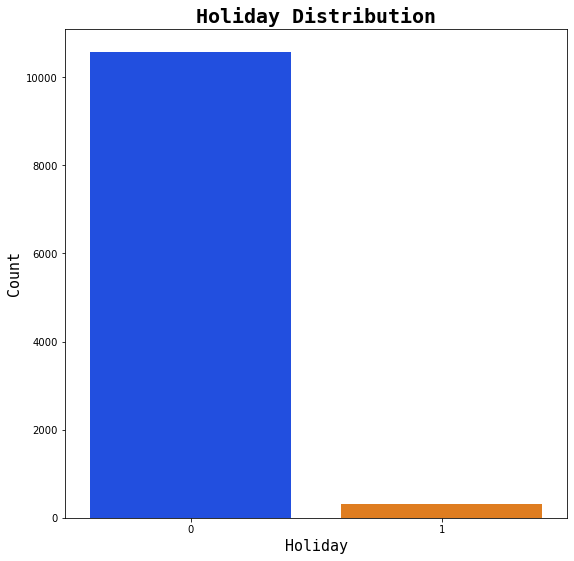

In [29]:
# Univariate Analysis

#barplots/countplots of all the CATEGORICAL VARIABLES
#season, holiday, working day, weather are categorical variables

#Holiday
plt.figure(figsize = (9, 9))
hol = dt['holiday'].value_counts()
sns.barplot(hol.index, hol.values, palette = 'bright')
plt.title('Holiday Distribution', fontdict = {'fontname' : 'Monospace','fontsize' : 20, 'fontweight' : 'bold'})
plt.xlabel('Holiday', fontdict = {'fontname' : 'Monospace', 'fontsize' : 15})
plt.ylabel('Count', fontdict = {'fontname' : 'Monospace', 'fontsize' : 15})
plt.tick_params(labelsize = 10)
plt.show()


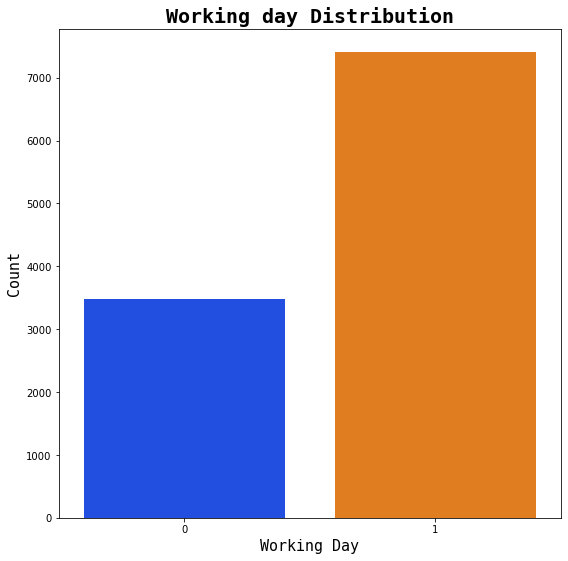

In [30]:
#Working day
plt.figure(figsize = (9, 9))
wok = dt['workingday'].value_counts()
sns.barplot(wok.index, wok.values, palette = 'bright')
plt.title('Working day Distribution', fontdict = {'fontname' : 'Monospace','fontsize' : 20, 'fontweight' : 'bold'})
plt.xlabel('Working Day', fontdict = {'fontname' : 'Monospace', 'fontsize' : 15})
plt.ylabel('Count', fontdict = {'fontname' : 'Monospace', 'fontsize' : 15})
plt.tick_params(labelsize = 10)
plt.show()

<AxesSubplot:ylabel='season'>

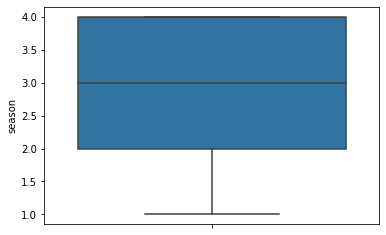

In [31]:
#Season

sns.boxplot(y = dt['season'])

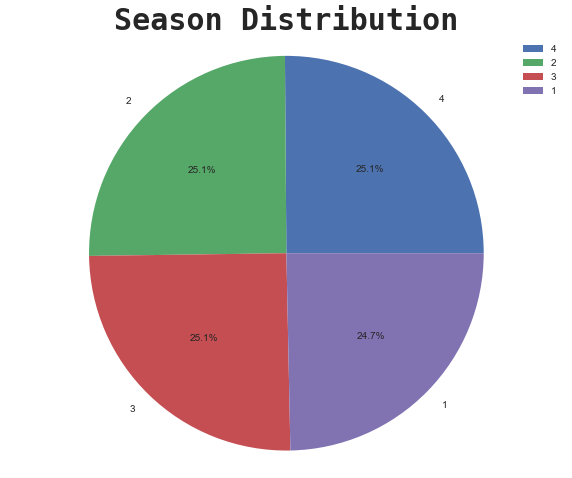

In [32]:
ssn = dt['season'].value_counts()
plt.style.use('seaborn')
plt.figure(figsize = (10, 8))
plt.pie(ssn.values, labels = ssn.index, autopct = '%1.1f%%')
plt.title('Season Distribution', fontdict = {'fontname' : 'Monospace','fontsize' : 30, 'fontweight' : 'bold'})
plt.legend()
plt.axis('equal')
plt.show()

<AxesSubplot:ylabel='season'>

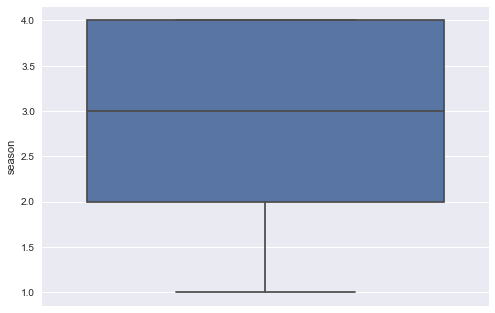

In [33]:
#weather

sns.boxplot(y = dt['season'])

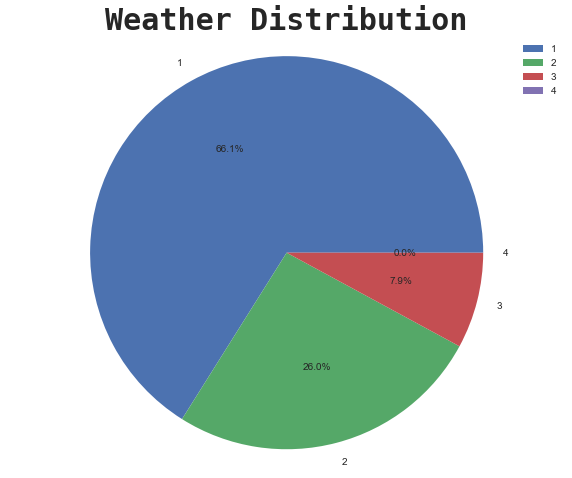

In [34]:
wtr = dt['weather'].value_counts()
plt.style.use('seaborn')
plt.figure(figsize = (10, 8))
plt.pie(wtr.values, labels = wtr.index, autopct = '%1.1f%%')
plt.title('Weather Distribution', fontdict = {'fontname' : 'Monospace','fontsize' : 30, 'fontweight' : 'bold'})
plt.legend()
plt.axis('equal')
plt.show()

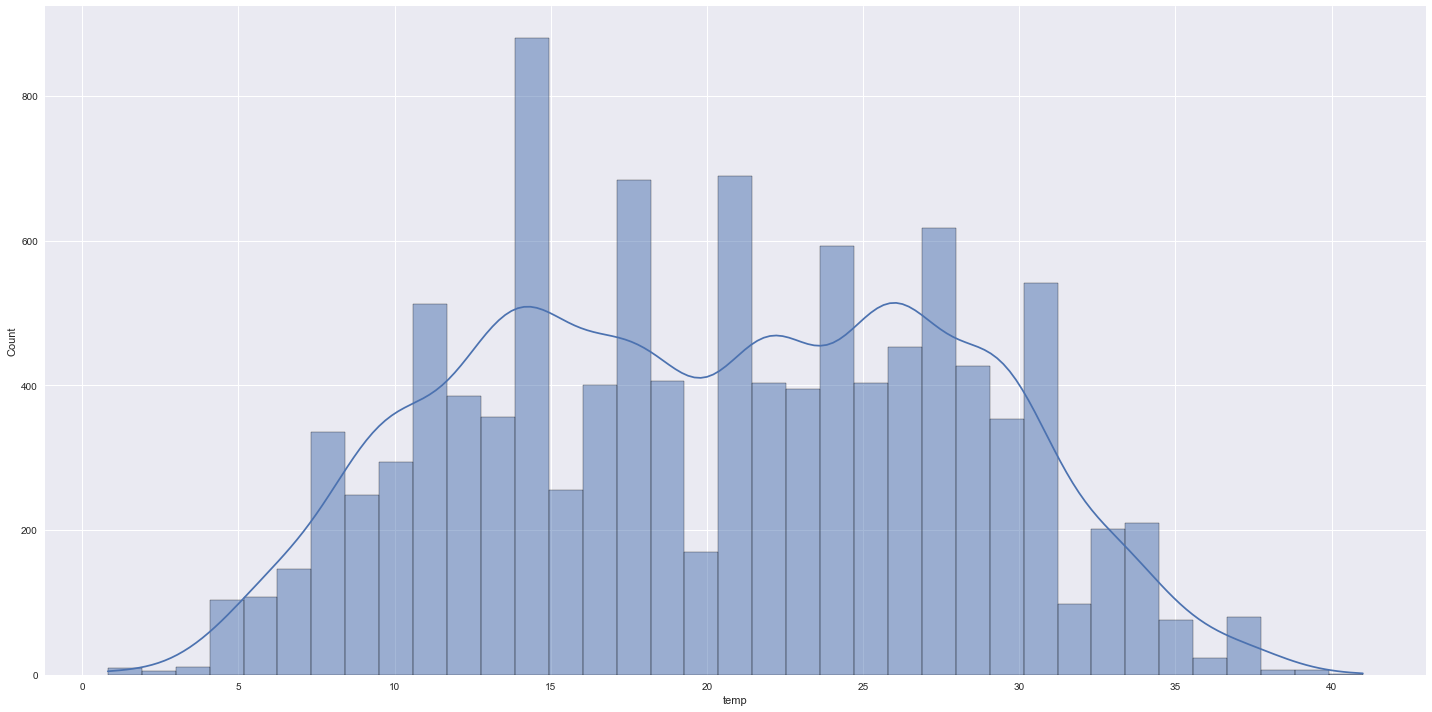

In [35]:
#for continous variables 



#temp 
sns.displot( dt.temp, kde= True, height = 10, aspect = 2)


<AxesSubplot:xlabel='temp', ylabel='count'>

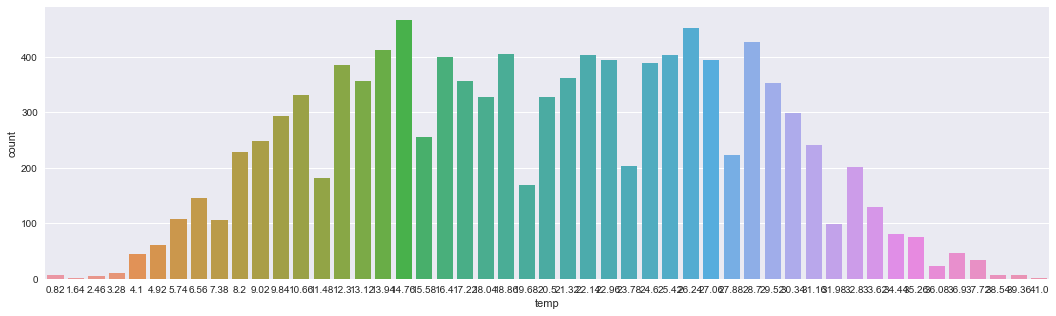

In [36]:
fig, ax = plt.subplots(figsize=(18, 5))
sns.countplot(x= 'temp', data = dt, ax= ax)

<AxesSubplot:xlabel='temp', ylabel='Count'>

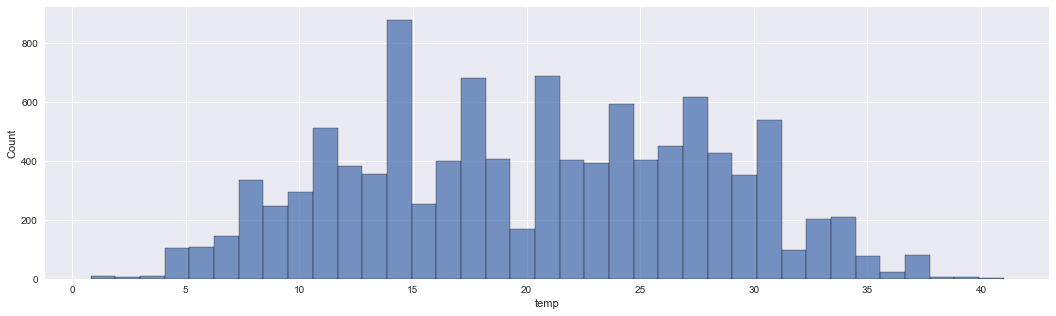

In [37]:
fig, ax = plt.subplots(figsize=(18, 5))
sns.histplot(data = dt, x = 'temp', ax=ax)

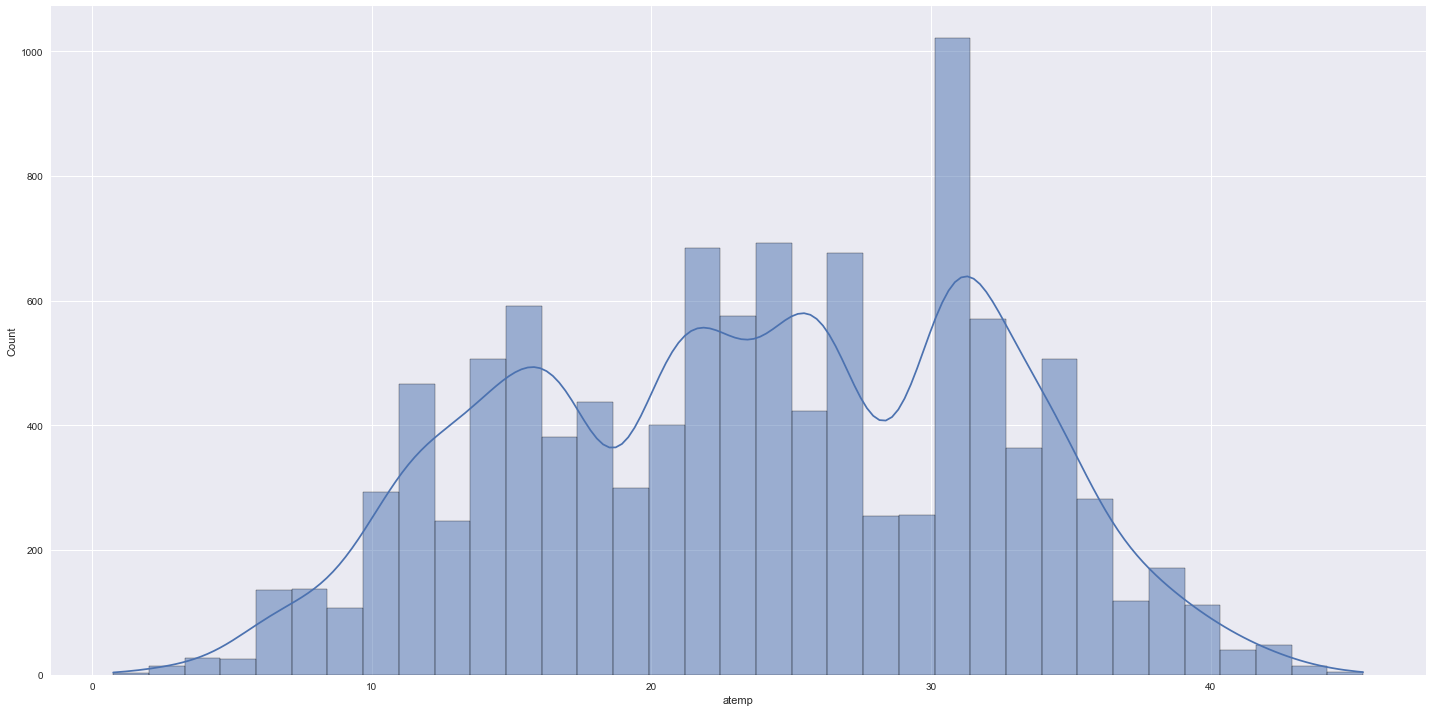

In [38]:
#atemp

sns.displot( dt.atemp, kde= True, height = 10, aspect = 2)

<AxesSubplot:xlabel='atemp', ylabel='count'>

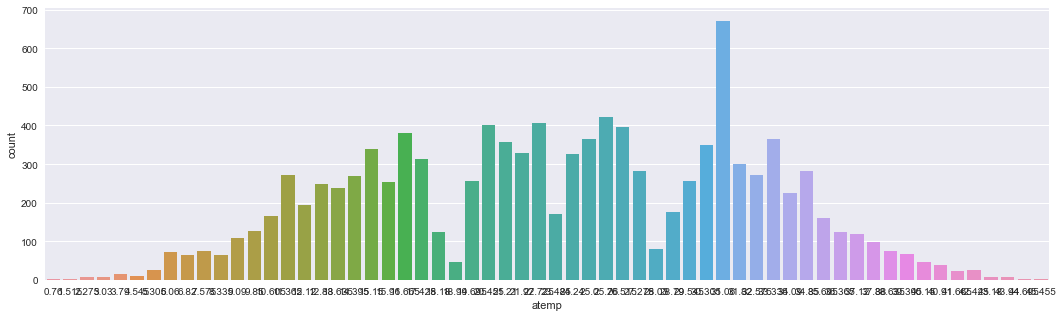

In [39]:
fig, ax = plt.subplots(figsize=(18, 5))
sns.countplot(x= 'atemp', data = dt, ax= ax)

<AxesSubplot:xlabel='atemp', ylabel='Count'>

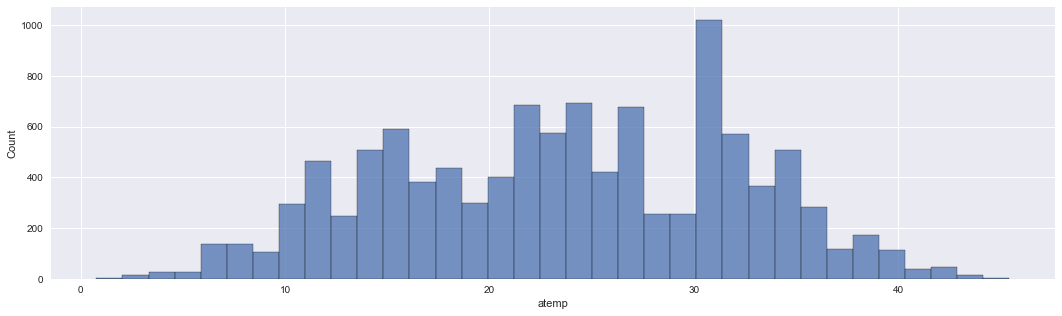

In [40]:
fig, ax = plt.subplots(figsize=(18, 5))
sns.histplot(data = dt, x = 'atemp', ax=ax)

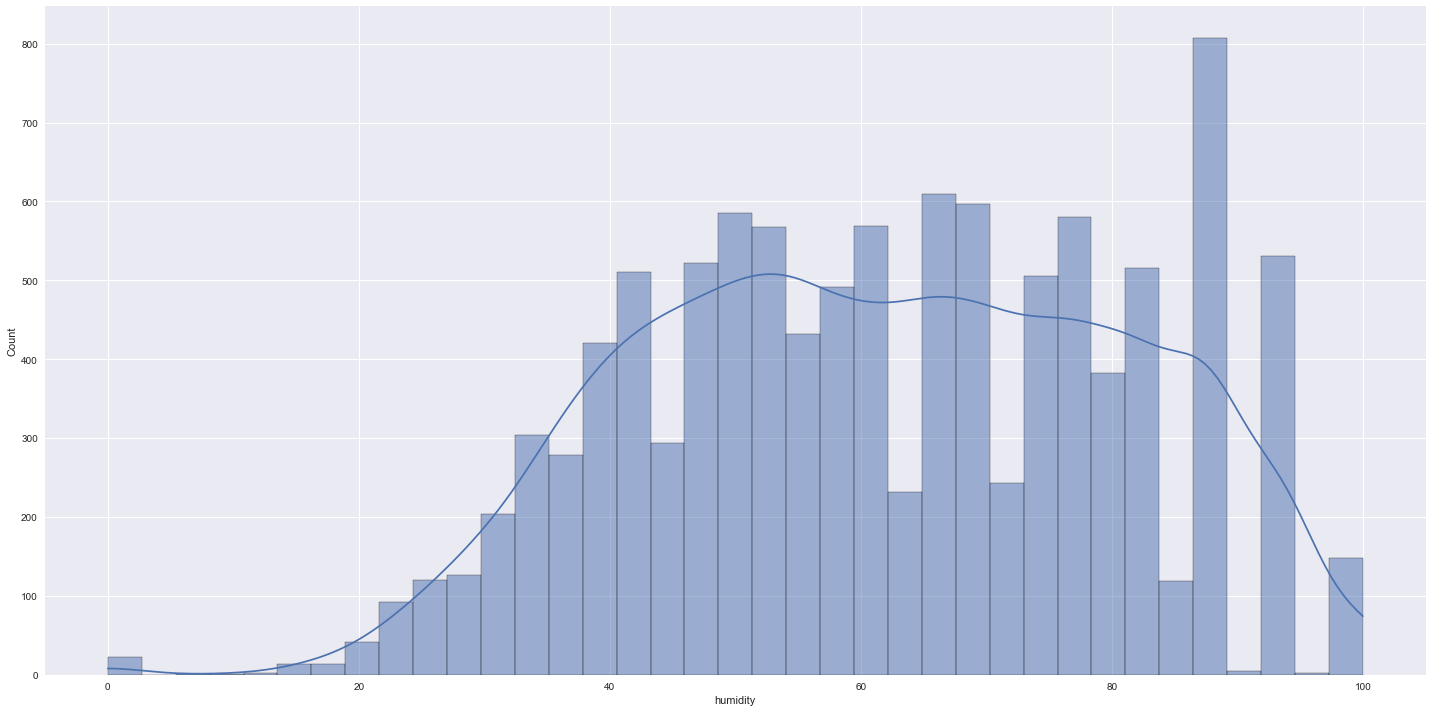

In [41]:
#humidity

sns.displot( dt.humidity, kde= True, height = 10, aspect = 2)

<AxesSubplot:xlabel='humidity', ylabel='count'>

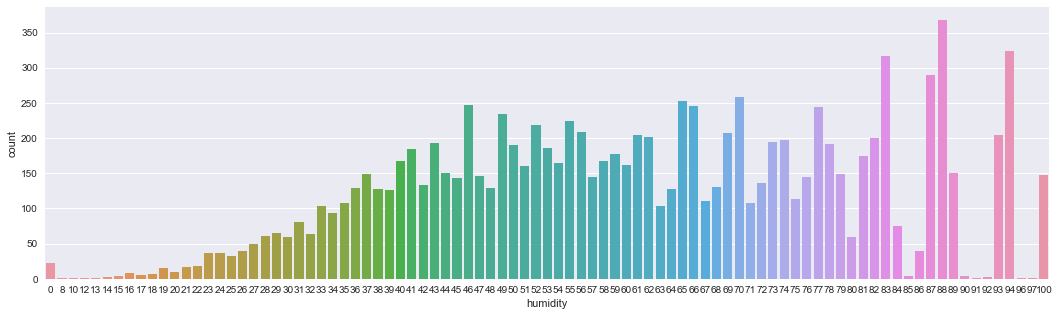

In [42]:
fig, ax = plt.subplots(figsize=(18, 5))
sns.countplot(x= 'humidity', data = dt, ax= ax)

<AxesSubplot:xlabel='humidity', ylabel='Count'>

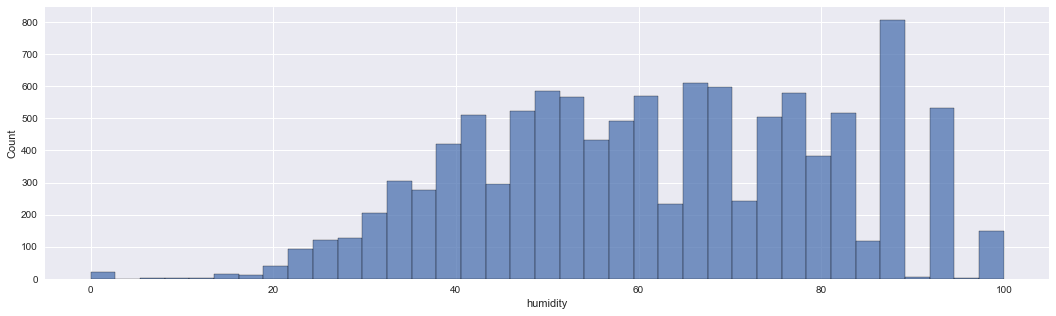

In [43]:
fig, ax = plt.subplots(figsize=(18, 5))
sns.histplot(data = dt, x = 'humidity', ax=ax)

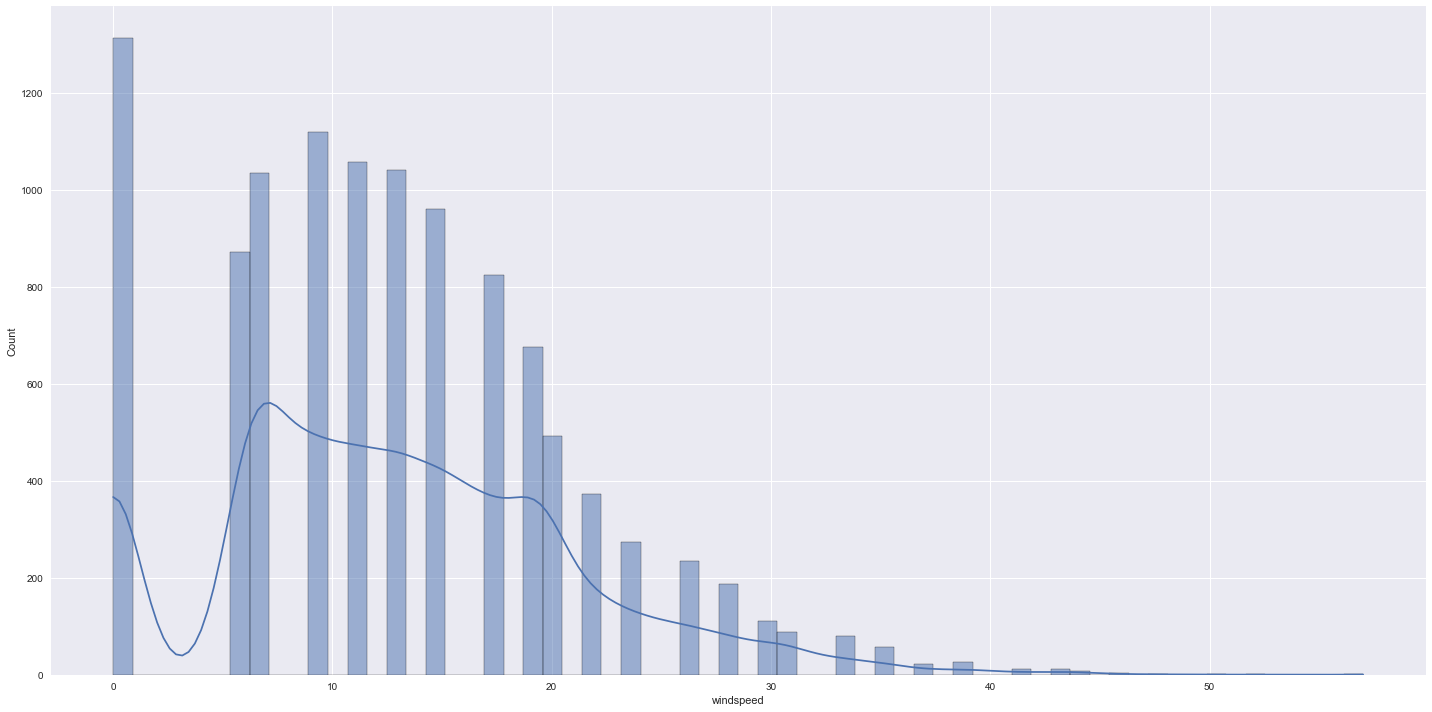

In [44]:
#windspeed

sns.displot( dt.windspeed, kde= True, height = 10, aspect = 2)

<AxesSubplot:xlabel='windspeed', ylabel='count'>

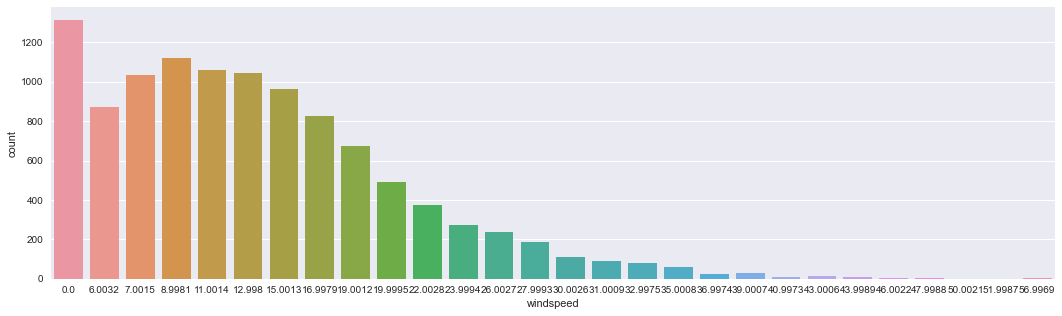

In [45]:
fig, ax = plt.subplots(figsize=(18, 5))
sns.countplot(x= 'windspeed', data = dt, ax= ax)

<AxesSubplot:xlabel='windspeed', ylabel='Count'>

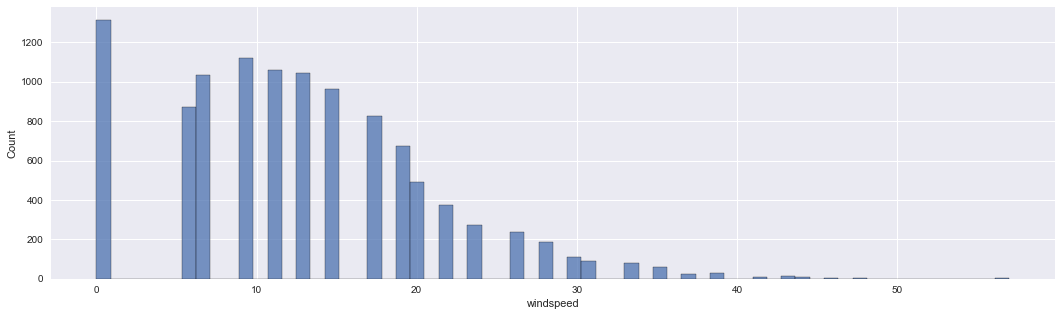

In [46]:
fig, ax = plt.subplots(figsize=(18, 5))
sns.histplot(data = dt, x = 'windspeed', ax=ax)

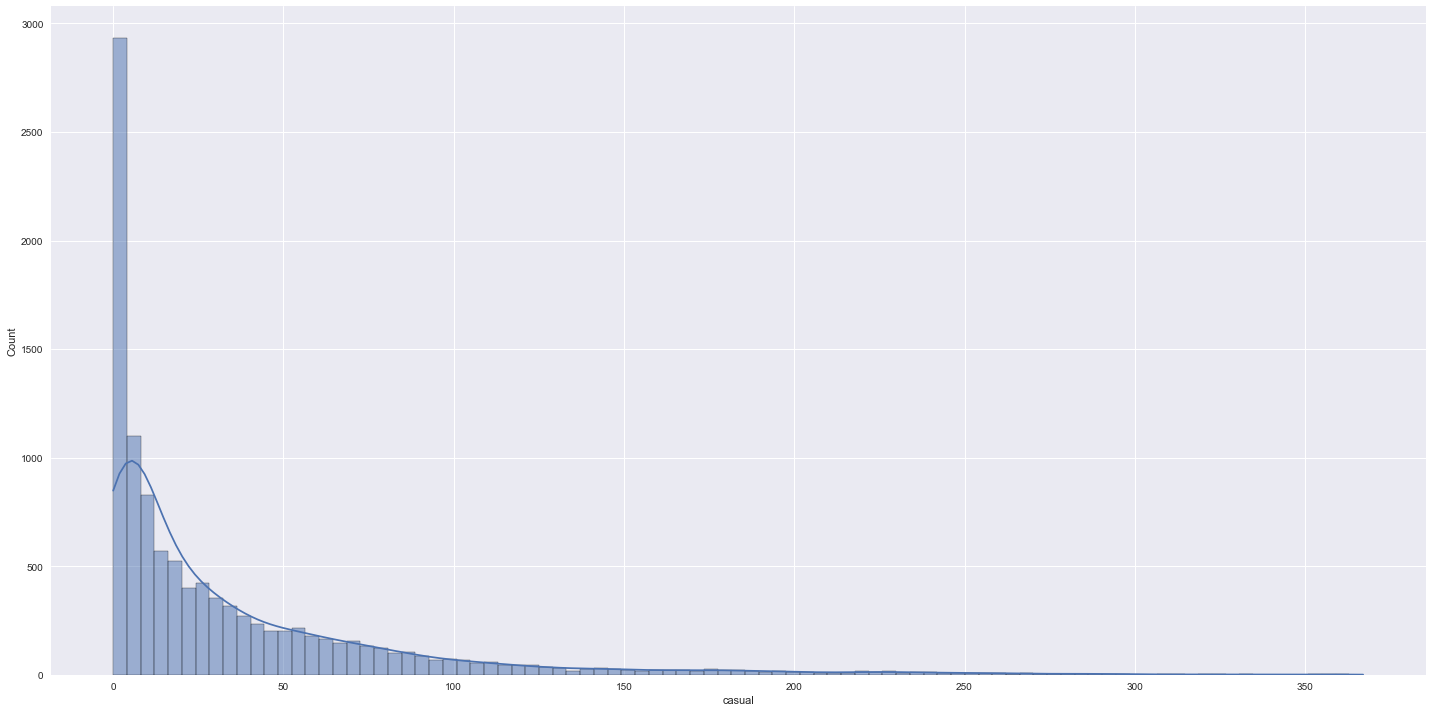

In [47]:
#casual

sns.displot( dt.casual, kde= True, height = 10, aspect = 2)

<AxesSubplot:xlabel='casual', ylabel='count'>

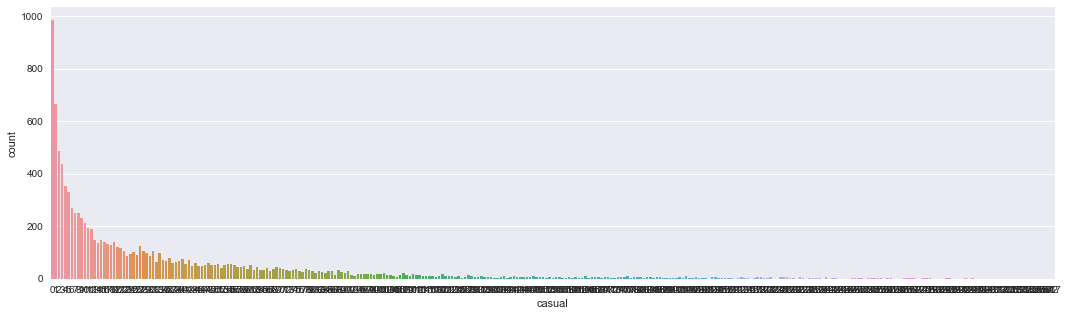

In [48]:
fig, ax = plt.subplots(figsize=(18, 5))
sns.countplot(x= 'casual', data = dt, ax= ax)

<AxesSubplot:xlabel='casual', ylabel='Count'>

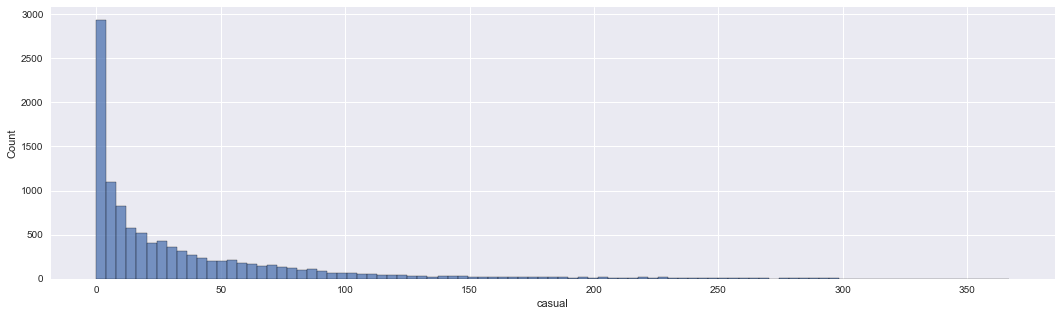

In [49]:
fig, ax = plt.subplots(figsize=(18, 5))
sns.histplot(data = dt, x = 'casual', ax=ax)

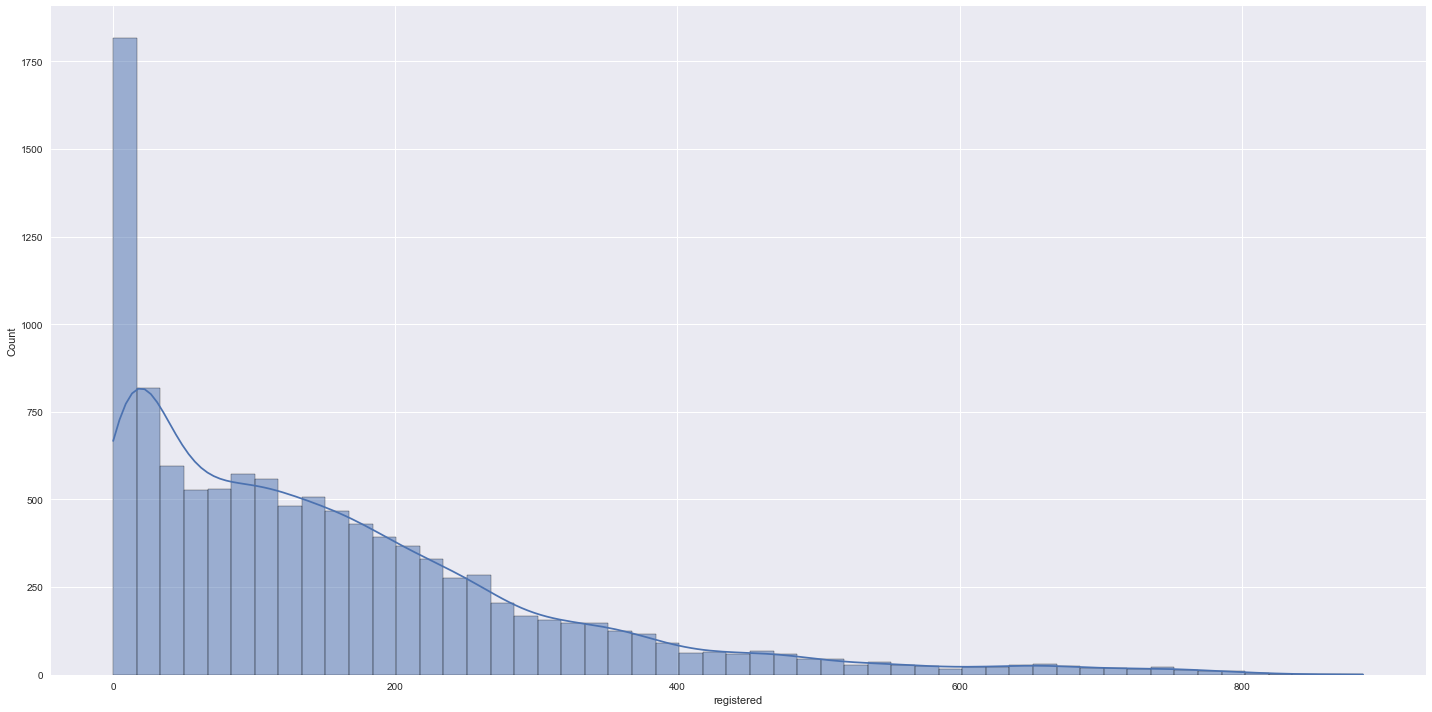

In [50]:
#registered  

sns.displot( dt.registered, kde= True, height = 10, aspect = 2)

<AxesSubplot:xlabel='registered', ylabel='count'>

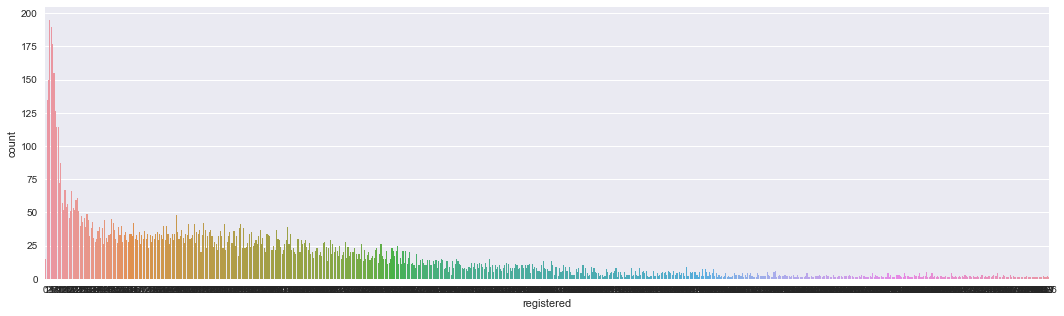

In [51]:
fig, ax = plt.subplots(figsize=(18, 5))
sns.countplot(x= 'registered', data = dt, ax= ax)

<AxesSubplot:xlabel='registered', ylabel='Count'>

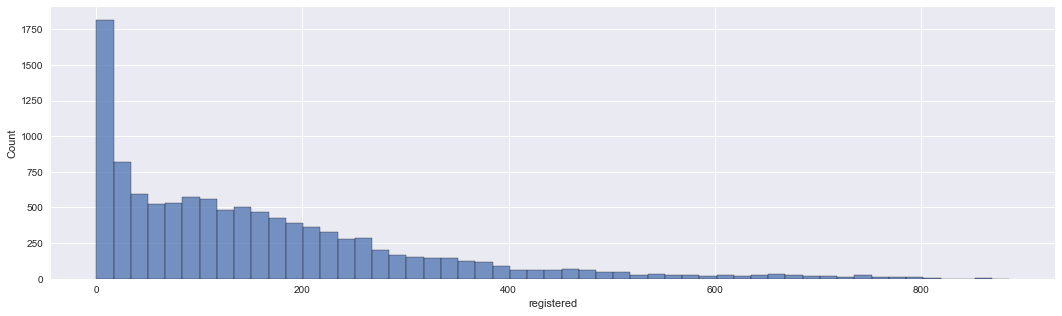

In [52]:
fig, ax = plt.subplots(figsize=(18, 5))
sns.histplot(data = dt, x = 'registered', ax=ax)

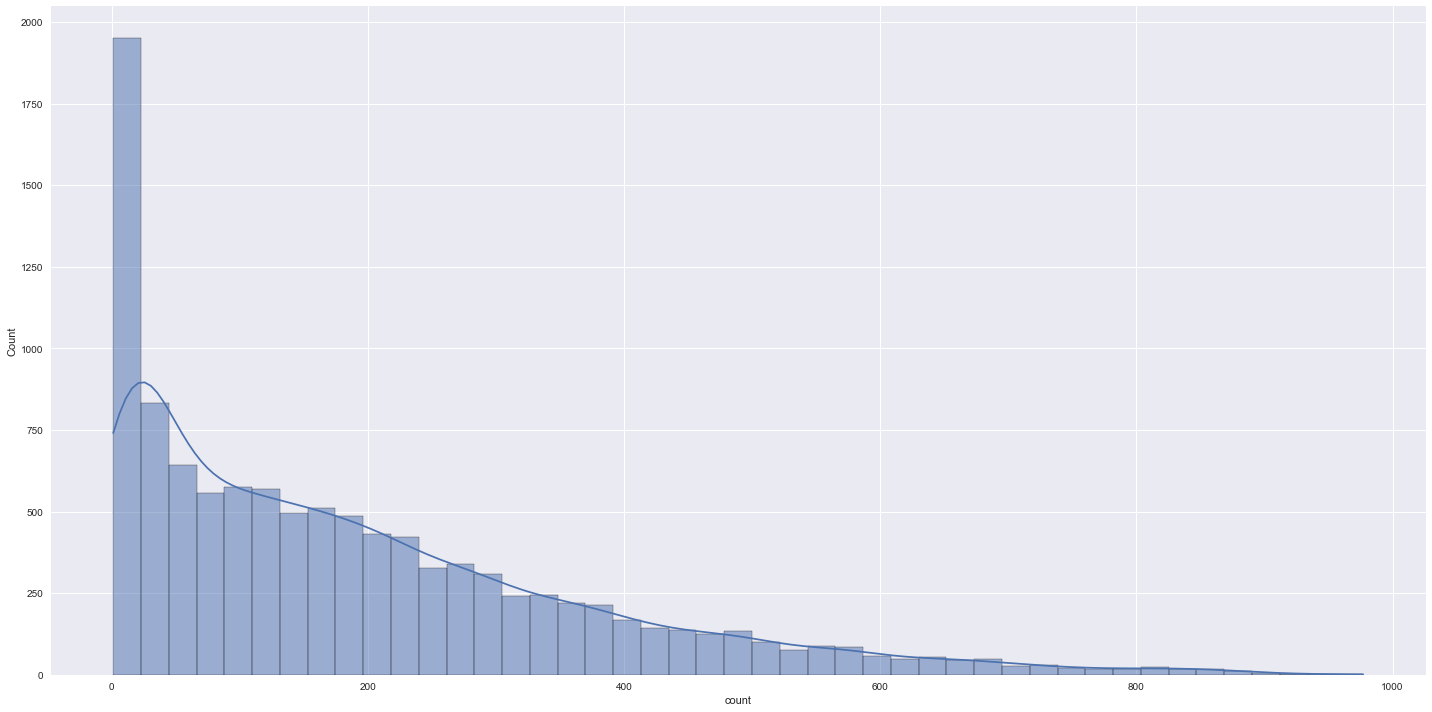

In [53]:
#count

sns.displot( dt["count"], kde= True, height = 10, aspect = 2)

<AxesSubplot:xlabel='count', ylabel='count'>

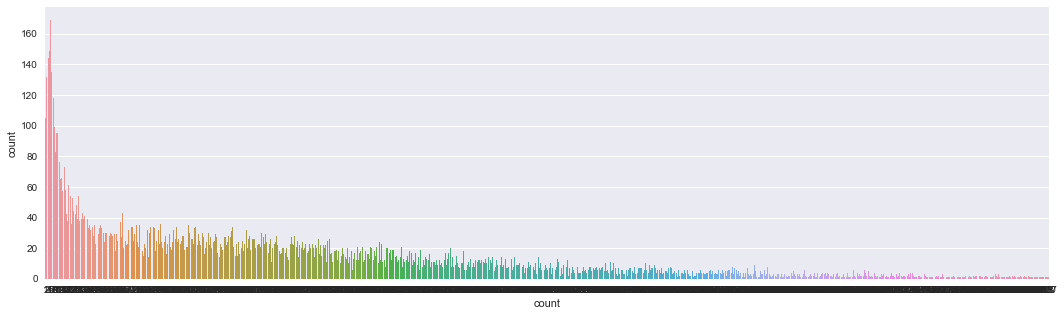

In [54]:
fig, ax = plt.subplots(figsize=(18, 5))
sns.countplot(x= 'count', data = dt, ax= ax)

<AxesSubplot:xlabel='count', ylabel='Count'>

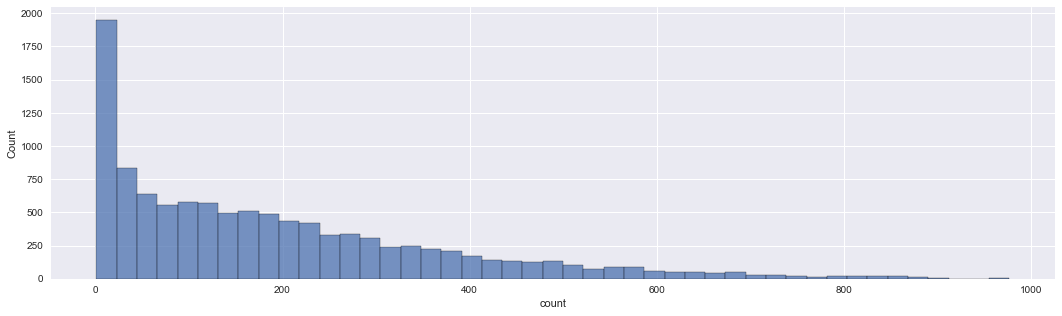

In [55]:
fig, ax = plt.subplots(figsize=(18, 5))
sns.histplot(data = dt, x = 'count', ax=ax)

<AxesSubplot:>

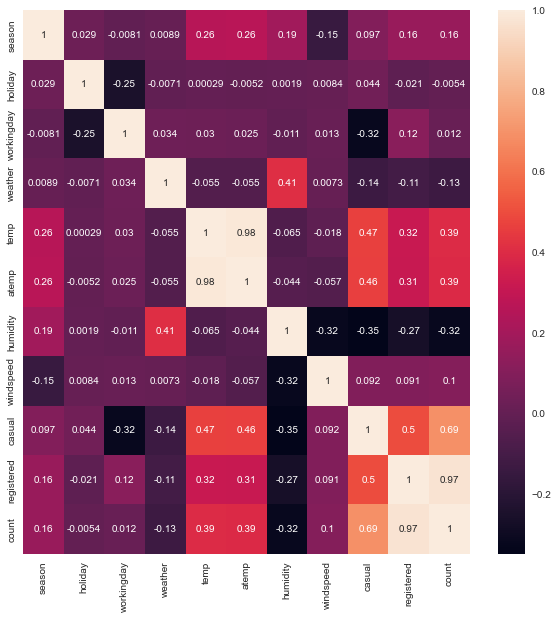

In [56]:
#BiVariate Analysis

#Heatmap

fig, ax = plt.subplots(figsize=(10, 10))
Var_Corr = dt.corr()
sns.heatmap(Var_Corr, xticklabels=Var_Corr.columns, yticklabels=Var_Corr.columns, annot=True, ax=ax)

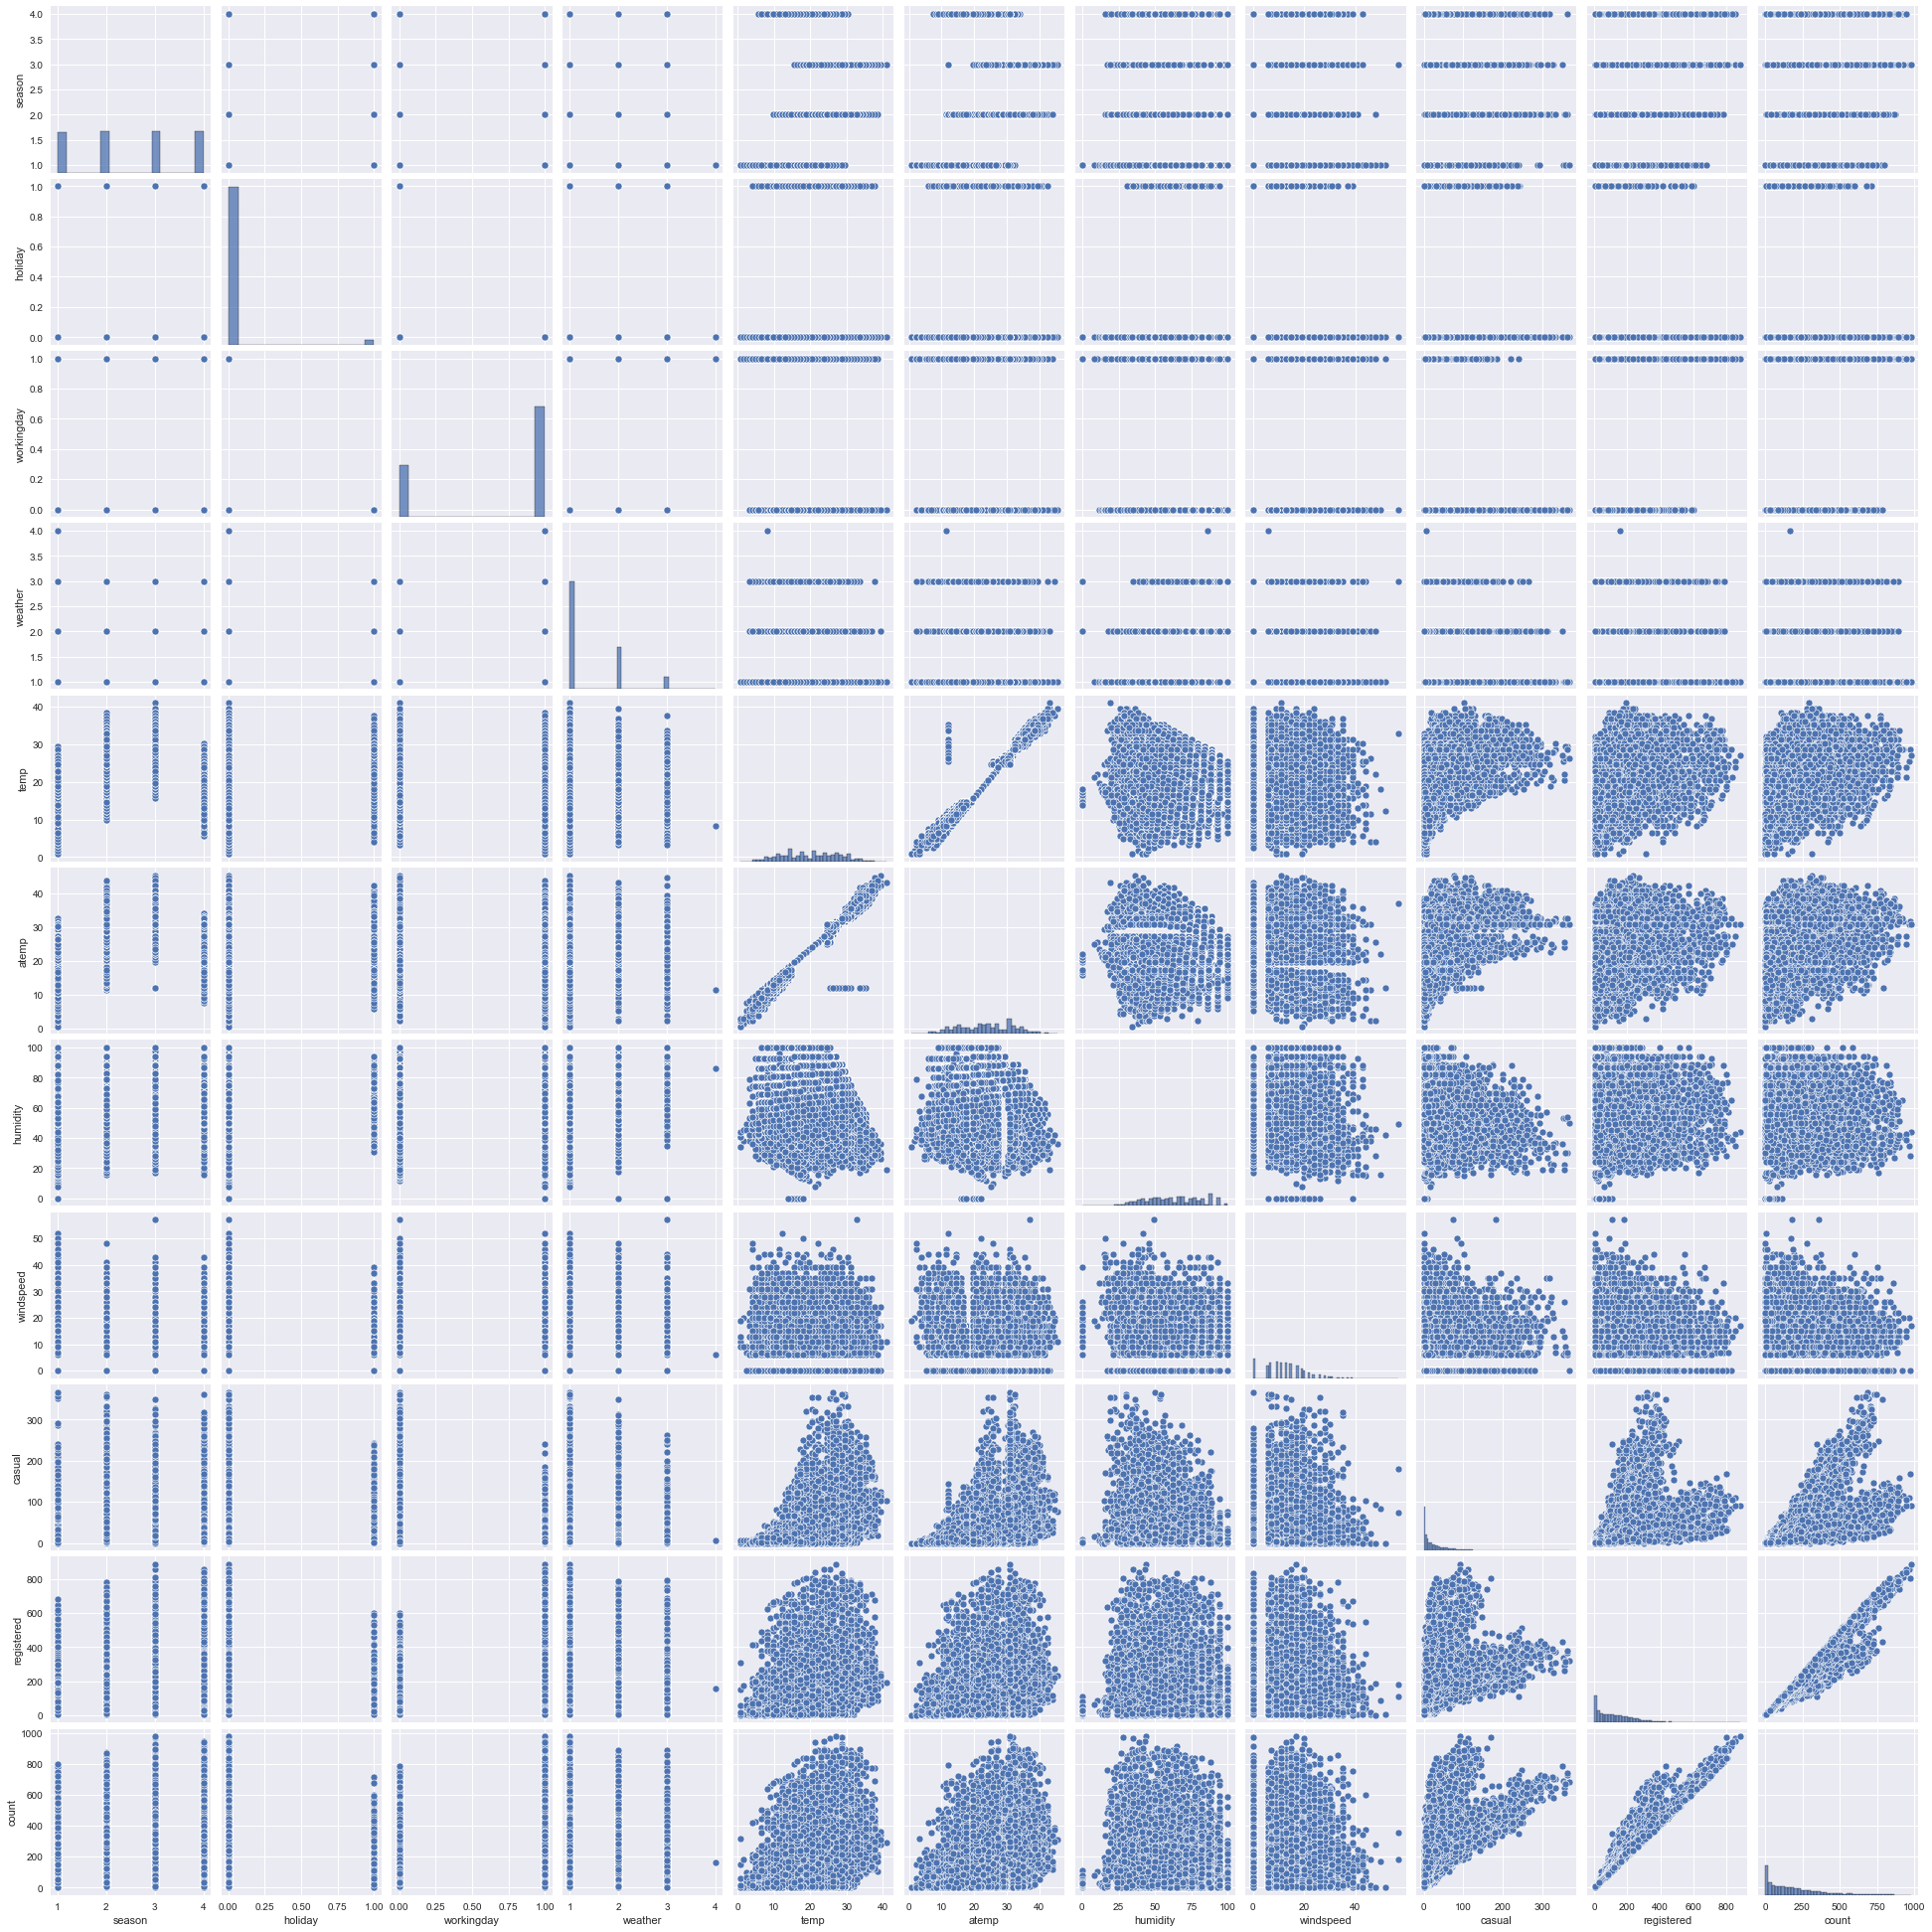

In [57]:
sns.pairplot(dt)

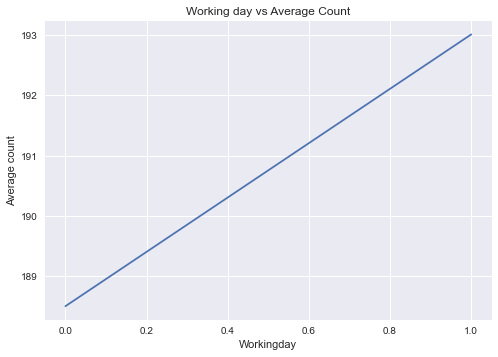

In [58]:
#workday and count

dt.groupby('workingday')['count'].mean().plot()
plt.xlabel('Workingday')
plt.ylabel('Average count')
plt.title('Working day vs Average Count')
plt.show()

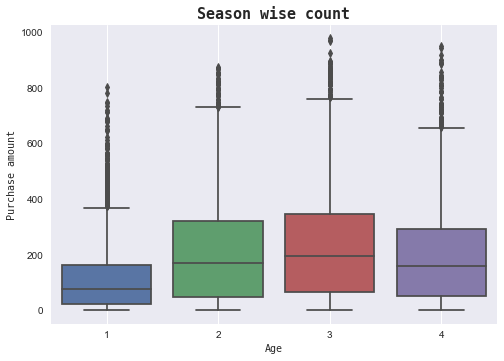

In [59]:
#season and count

sns.boxplot(dt['season'], dt['count'])
plt.title('Season wise count', fontdict = {'fontname' : 'Monospace', 'fontsize': 15, 'fontweight' : 'bold'})
plt.xlabel('Age', fontdict = {'fontname' : 'Monospace', 'fontsize' : 10})
plt.ylabel('Purchase amount', fontdict = {'fontname' : 'Monospace', 'fontsize' :10})
plt.tick_params(labelsize = 10)
plt.grid()
plt.show()

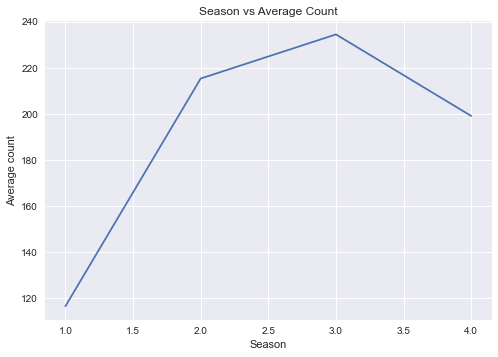

In [60]:
dt.groupby('season')['count'].mean().plot()
plt.xlabel('Season')
plt.ylabel('Average count')
plt.title('Season vs Average Count')
plt.show()

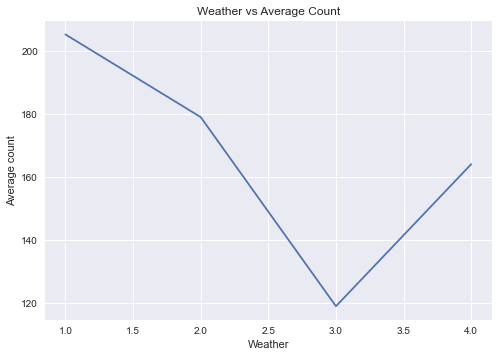

In [61]:
#weather and count

dt.groupby('weather')['count'].mean().plot()
plt.xlabel('Weather')
plt.ylabel('Average count')
plt.title('Weather vs Average Count')
plt.show()

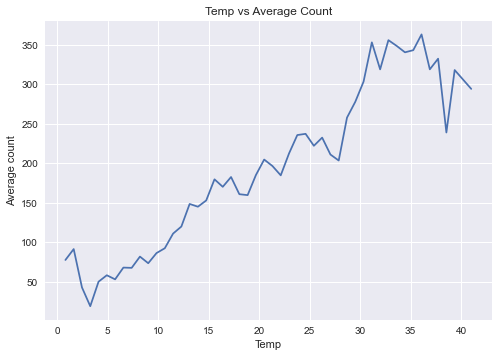

In [62]:
#temp and count
dt.groupby('temp')['count'].mean().plot()
plt.xlabel('Temp')
plt.ylabel('Average count')
plt.title('Temp vs Average Count')
plt.show()

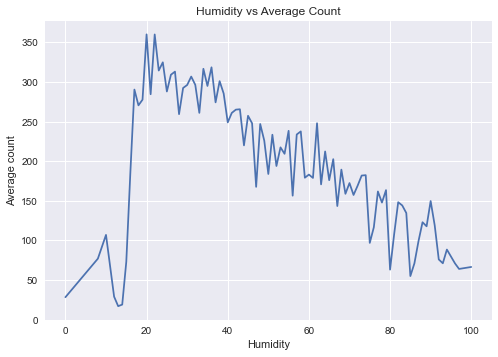

In [63]:
#humidity and count
dt.groupby('humidity')['count'].mean().plot()
plt.xlabel('Humidity')
plt.ylabel('Average count')
plt.title('Humidity vs Average Count')
plt.show()

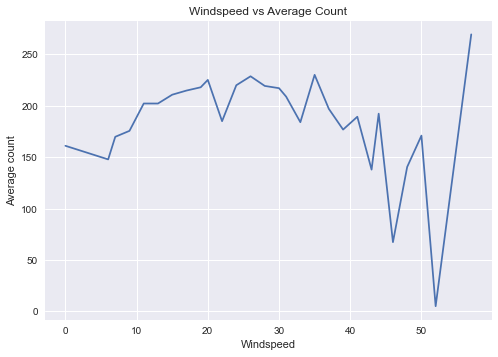

In [64]:
#windspeed and count
dt.groupby('windspeed')['count'].mean().plot()
plt.xlabel('Windspeed')
plt.ylabel('Average count')
plt.title('Windspeed vs Average Count')
plt.show()

<AxesSubplot:xlabel='workingday', ylabel='casual'>

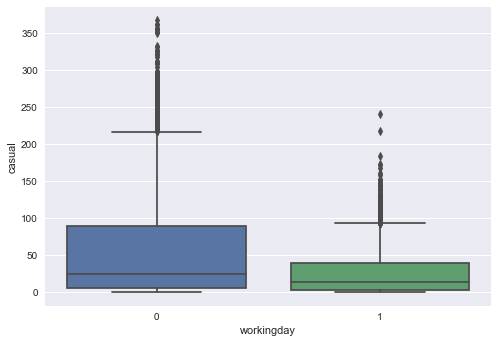

In [65]:
#working day with casual

sns.boxplot(dt['workingday'], dt['casual'])


<AxesSubplot:xlabel='workingday', ylabel='registered'>

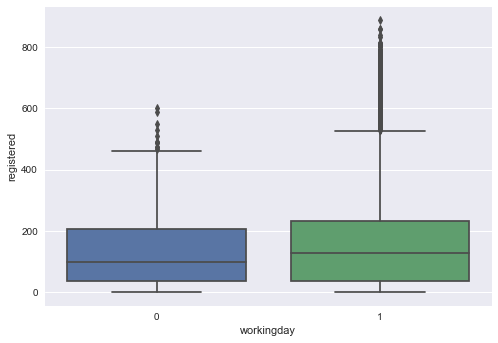

In [66]:
#working day with registered

sns.boxplot(dt['workingday'], dt['registered'])


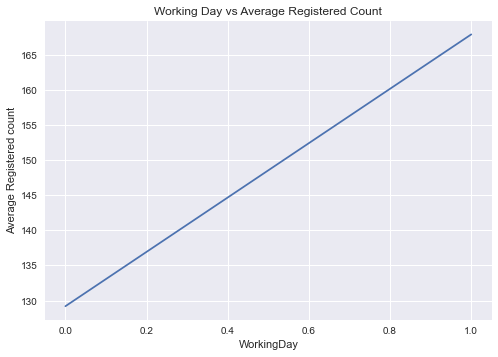

In [67]:
dt.groupby('workingday')['registered'].mean().plot()
plt.xlabel('WorkingDay')
plt.ylabel('Average Registered count')
plt.title('Working Day vs Average Registered Count')
plt.show()

In [68]:
#Hypothesis Tesintg


In [69]:
#2- Sample T-Test to check if Working Day has an effect on the number of electric cycles rented

dtgw =  dt.groupby('workingday')['count']

In [70]:
dtgw.mean()

workingday
0    188.506621
1    193.011873
Name: count, dtype: float64

In [71]:
av0 =  dtgw.mean().loc[0]

In [72]:
av1 = dtgw.mean().loc[1]

In [73]:
dtgw.std()

workingday
0    173.724015
1    184.513659
Name: count, dtype: float64

In [74]:
s0 = dtgw.std().loc[0]

In [75]:
s1 = dtgw.std().loc[1]

In [76]:
dtgw.count()

workingday
0    3474
1    7412
Name: count, dtype: int64

In [77]:
n0 = dtgw.count().loc[0]

In [78]:
n1 = dtgw.count().loc[1]

In [79]:
t = (av0 - av1) /  ( ( (s0*s0)/n0 + (s1*s1)/n1 )**(1/2) )

In [80]:
#t value the absolute value is considered for comparison with critical value
t

-1.2362580418223228

In [81]:
#ANNOVA to check if No. of cycles rented is similar or different in different 1. weather 2. season

In [82]:
#Weather

dtwc = []
for i in range(1, 5):
    dtwi =  dt[dt["weather"] == i]["count"]
    dtwc.append(dtwi)


In [83]:
f_oneway(dtwc[0], dtwc[1], dtwc[2], dtwc[3])



F_onewayResult(statistic=65.53024112793271, pvalue=5.482069475935669e-42)

In [84]:
#Season

dtsc = []
for i in range(1,5):
    dtsi = dt[dt['season'] == i]["count"]
    dtsc.append(dtsi)


In [85]:
f_oneway(dtsc[0], dtsc[1], dtsc[2], dtsc[3])


F_onewayResult(statistic=236.94671081032106, pvalue=6.164843386499654e-149)

In [86]:
#Chi-square test to check if Weather is dependent on the season (10 points)

In [87]:
contigency= pd.crosstab(dt['season'], dt['weather'])
contigency

weather,1,2,3,4
season,,,,
1,1759,715,211,1
2,1801,708,224,0
3,1930,604,199,0
4,1702,807,225,0


In [88]:
stat, p, dof, expected = chi2_contingency(contigency)

In [89]:
p

1.549925073686492e-07

In [92]:
dt["datetime"].min()

Timestamp('2011-01-01 00:00:00')

In [93]:
dt["datetime"].max()

Timestamp('2012-12-19 23:00:00')